<a href="https://colab.research.google.com/github/Shreya-07/CMPE255_clustering/blob/main/CMPE255_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Customer.csv')
df.head(8)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [4]:
X=df.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

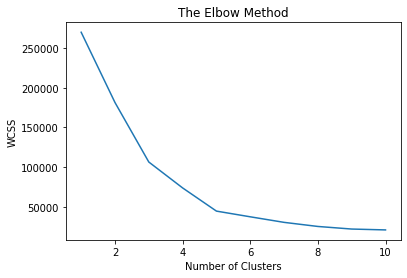

In [7]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Fitting K-MEans to the dataset

In [8]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

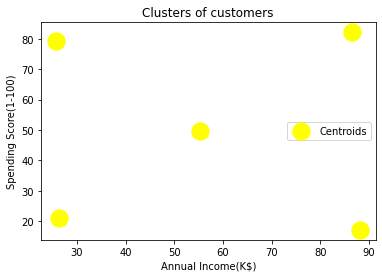

In [9]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

Hierarchical Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch

In [11]:
label_encoder = preprocessing.LabelEncoder() 

df['Genre'] = label_encoder.fit_transform(df['Genre'])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


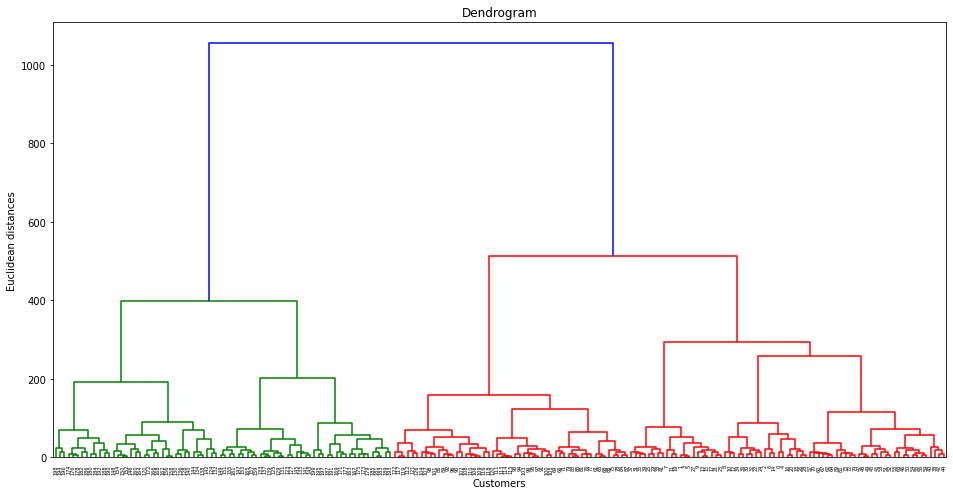

In [12]:
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

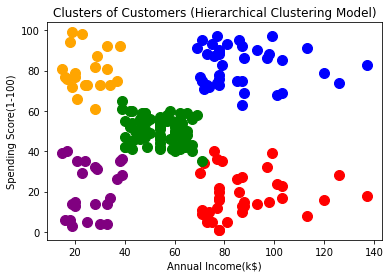

In [14]:
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

DB Scan Clustering

In [15]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [16]:
X = df.iloc[:, [3, 4]].values

In [17]:
dbscan=DBSCAN(eps=3,min_samples=4)

In [18]:
model=dbscan.fit(X)
labels=model.labels_

In [19]:
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True

In [20]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)

In [21]:
print(metrics.silhouette_score(X,labels))

-0.1908319132560097


In [22]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

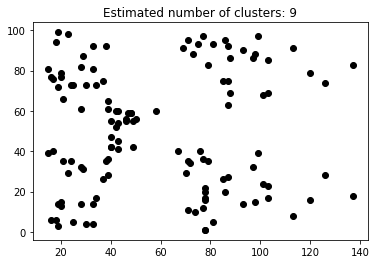

In [23]:
xy = X[class_member_mask & sample_cores]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
markeredgecolor='k', markersize=14)

xy = X[class_member_mask & ~sample_cores]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

Gaussian Mixture Models

In [24]:
df1 = pd.read_csv('/content/drive/MyDrive/Clustering_gmm.csv')
df1.head(8)

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
5,61.577160,168.091751
6,63.341866,170.642516
7,61.041643,170.096682


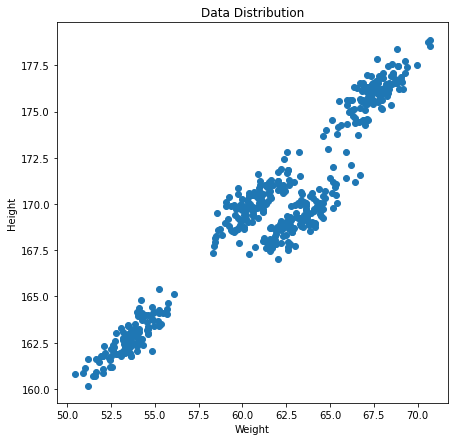

In [26]:
plt.figure(figsize=(7,7))
plt.scatter(df1["Weight"],df1["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

In [27]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(df1)

GaussianMixture(n_components=4)

In [28]:
labels = gmm.predict(df1)
frame = pd.DataFrame(df1)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

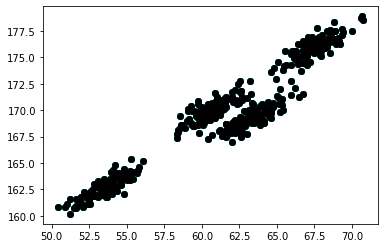

In [29]:
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(df1["Weight"],df1["Height"],c=color[k])
plt.show()